## USA Rugby EDA
### on player availability, daily wellness, sonra

In [52]:
# EDA, manipuation, and cleaning packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# modeling
from sklearn.model_selection import train_test_split

### Import Data

In [2]:
avail = pd.read_csv('/Users/linanguyen/Desktop/Capstone/Cap.csv', error_bad_lines = False)

In [3]:
avail

,Row Labels,Away,Full,Modified,No Training,Grand Total
0,13/10/2019,NaN,12.0,NaN,NaN,12
1,13/12/2021,NaN,12.0,4.0,2.0,18
2,14/01/2022,1.0,14.0,1.0,3.0,19
3,14/02/2022,NaN,14.0,1.0,4.0,19
4,14/03/2021,NaN,1.0,NaN,NaN,1
...,...,...,...,...,...,...
147,11/4/22,NaN,13.0,4.0,2.0,19
148,12/1/22,1.0,15.0,NaN,3.0,19
149,12/3/22,NaN,14.0,2.0,3.0,19
150,12/4/22,NaN,11.0,5.0,3.0,19


In [4]:
well = pd.read_csv('/Users/linanguyen/Desktop/Capstone/daily wellness excel report.csv')

In [5]:
well.columns

Index(['Date', 'About', 'by', '7s Position', 'Sex',
       'Have you had any COVID related symptoms?', 'Cough',
       'Shortness of breath', 'Sore throat', 'Nasal congestion',
       ...
       'Mood Mean', 'Mood Stddev', 'Mood Z Score', 'Mood Status', 'Mood STEN',
       'Soreness Feedback', 'Sleep Duration Feedback', 'Index',
       'Entries in Last 30 Days', '30 Day Compliance'],
      dtype='object', length=101)

In [6]:
stat = pd.read_csv('/Users/linanguyen/Desktop/Capstone/statsports sonra excel report.csv')

/Users/linanguyen/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
stat.columns

Index(['Date', 'About', 'Player', 'DOB', 'Age', 'Position', 'Month',
       'Year Text', 'Year Number', 'Season',
       ...
       'HSR Monthly Load', 'HSR AC', 'Running Distance AC',
       'Z6 Distance 7 Day Load', 'Z6 Distance 28 Day Load',
       'Sprint Distance Monthly', 'Z6 Distance AC', 'HI A+D 7 Day Load',
       'HI A+D 28 Day Load', 'HI A+D AC'],
      dtype='object', length=318)

### Cleaning Data

In [8]:
# wellness data
# we will only keep columns Date, and Wellness Score, and find team average of wellness score by date
# for reference, wellness score tells us the phyisical and emotional state of an athelte that day, out of 42
wellsmall = well[['Date', 'Wellness Score']]

In [9]:
# convert Date to datetime format
wellsmall['Date'] = pd.to_datetime(wellsmall['Date'])

<ipython-input-9-4c3a0dc02402>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wellsmall['Date'] = pd.to_datetime(wellsmall['Date'])


In [10]:
wellsmall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4329 entries, 0 to 4328
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            4329 non-null   datetime64[ns]
 1   Wellness Score  2607 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 67.8 KB


In [11]:
# grouping data by date column
wellsmall = wellsmall.groupby('Date', as_index = False)['Wellness Score'].mean()
wellsmall

,Date,Wellness Score
0,2021-01-11,27.058824
1,2021-01-12,25.416667
2,2021-02-11,24.625000
3,2021-02-12,25.909091
4,2021-03-11,24.400000
...,...,...
248,2022-12-02,22.600000
249,2022-12-03,25.928571
250,2022-12-04,26.500000
251,2022-12-05,28.687500


In [12]:
# look at distribution. Wellness score is out of 42
wellsmall.describe()

,Wellness Score
count,253.000000
mean,26.519064
std,2.458463
min,16.500000
25%,25.285714
50%,26.684211
75%,28.090909
max,32.666667


In [13]:
# check for null values
wellsmall['Wellness Score'].isna().sum()

0

In [14]:
# Daily Availability
# Full = 2, Modified = 1, No Training = 0
# make dataframe of Date, count of full, count of modified, count of no training, % of full availability
# replace NaN with 0
avail = avail.fillna(0)

In [15]:
# create a column of full availability percentage
avail['Full%'] = avail['Full']/avail['Grand Total'] 

In [16]:
# convert Date to datetime format
avail['Row Labels'] = pd.to_datetime(avail['Row Labels'])
avail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Row Labels   152 non-null    datetime64[ns]
 1   Away         152 non-null    float64       
 2   Full         152 non-null    float64       
 3   Modified     152 non-null    float64       
 4   No Training  152 non-null    float64       
 5   Grand Total  152 non-null    int64         
 6   Full%        152 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 8.4 KB


In [17]:
# rename 'Row Labels' to 'Date'
avail = avail.rename(columns = {"Row Labels": "Date"})

In [18]:
avail.describe()

,Away,Full,Modified,No Training,Grand Total,Full%
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,0.671053,11.342105,1.815789,2.236842,16.065789,0.737099
std,1.555917,4.075618,1.621140,1.811431,5.668165,0.206601
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,11.000000,0.000000,0.000000,12.000000,0.600000
50%,0.000000,12.000000,2.000000,2.000000,19.000000,0.736842
75%,1.000000,13.000000,3.000000,4.000000,19.000000,1.000000
max,8.000000,30.000000,5.000000,7.000000,38.000000,1.000000


In [19]:
# SONRA Stat
# Running load will only be examined because that's what is mainly looked at for team field sports
statsmall = stat[['Date', 'Drill Running Load', 'Total Weekly Running Load', 'Running 7 Day Load', 'Running 28 Day Load']]

In [20]:
# drop rows with NaN because every practice, every player produces 6 rows of data, with 5 rows empty in load columns
# finding team averages by date
statsmall = statsmall.dropna()
statsmall = statsmall.groupby('Date', as_index = False)[['Drill Running Load', 'Total Weekly Running Load', 'Running 7 Day Load', 'Running 28 Day Load']].mean()

In [21]:
# convert Date to datetime format
statsmall['Date'] = pd.to_datetime(statsmall['Date'])

In [22]:
statsmall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       249 non-null    datetime64[ns]
 1   Drill Running Load         249 non-null    float64       
 2   Total Weekly Running Load  249 non-null    float64       
 3   Running 7 Day Load         249 non-null    float64       
 4   Running 28 Day Load        249 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 11.7 KB


In [23]:
statsmall

,Date,Drill Running Load,Total Weekly Running Load,Running 7 Day Load,Running 28 Day Load
0,2021-01-10,82.666667,223.666667,1004.333333,1048.666667
1,2021-01-11,73.588235,109.352941,1073.117647,1292.352941
2,2021-01-02,36.958333,53.250000,641.416667,641.416667
3,2022-01-03,50.270270,67.486486,1245.675676,1151.648649
4,2022-01-04,33.068966,275.241379,1431.620690,1210.827586
...,...,...,...,...,...
244,2021-09-04,19.541667,173.875000,655.708333,871.208333
245,2022-09-05,49.545455,70.696970,1725.818182,1054.939394
246,2021-09-06,72.736842,167.157895,889.473684,852.473684
247,2021-09-07,55.300000,333.300000,1299.900000,1181.800000


In [24]:
# merge data by date
df = statsmall.merge(avail, how = 'left', on = 'Date')
df = df.merge(wellsmall, how = 'left', on = 'Date')

In [25]:
df

,Date,Drill Running Load,Total Weekly Running Load,Running 7 Day Load,Running 28 Day Load,Away,Full,Modified,No Training,Grand Total,Full%,Wellness Score
0,2021-01-10,82.666667,223.666667,1004.333333,1048.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-11,73.588235,109.352941,1073.117647,1292.352941,4.0,7.0,2.0,5.0,18.0,0.388889,27.058824
2,2021-01-02,36.958333,53.250000,641.416667,641.416667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-03,50.270270,67.486486,1245.675676,1151.648649,0.0,30.0,4.0,4.0,38.0,0.789474,30.692308
4,2022-01-04,33.068966,275.241379,1431.620690,1210.827586,NaN,NaN,NaN,NaN,NaN,NaN,27.357143
...,...,...,...,...,...,...,...,...,...,...,...,...
244,2021-09-04,19.541667,173.875000,655.708333,871.208333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,2022-09-05,49.545455,70.696970,1725.818182,1054.939394,0.0,14.0,3.0,2.0,19.0,0.736842,29.545455
246,2021-09-06,72.736842,167.157895,889.473684,852.473684,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,2021-09-07,55.300000,333.300000,1299.900000,1181.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df.describe()

,Drill Running Load,Total Weekly Running Load,Running 7 Day Load,Running 28 Day Load,Away,Full,Modified,No Training,Grand Total,Full%,Wellness Score
count,249.000000,249.000000,249.000000,249.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,125.000000
mean,40.055735,136.573811,1081.834189,1107.092448,0.923077,12.307692,2.717949,3.269231,19.217949,0.645603,27.200453
std,19.243997,90.107671,318.924000,208.332000,1.891672,3.224531,1.257677,1.335558,3.217838,0.126466,1.918032
min,0.000000,2.000000,262.000000,622.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.363636,19.636364
25%,27.161290,65.689655,869.666667,951.407407,0.000000,11.000000,2.000000,2.000000,19.000000,0.578947,26.000000
50%,36.173913,112.846154,1089.153846,1111.666667,0.000000,12.000000,3.000000,3.000000,19.000000,0.666667,27.250000
75%,50.727273,190.000000,1278.379310,1191.230769,1.000000,14.000000,4.000000,4.000000,19.000000,0.736842,28.466667
max,110.111111,515.562500,2091.454545,2082.250000,8.000000,30.000000,5.000000,7.000000,38.000000,1.000000,31.529412


In [27]:
# check for null values
df.isna().sum()

Date                           0
Drill Running Load             0
Total Weekly Running Load      0
Running 7 Day Load             0
Running 28 Day Load            0
Away                         171
Full                         171
Modified                     171
No Training                  171
Grand Total                  171
Full%                        171
Wellness Score               124
dtype: int64

In [28]:
# impute null values with mean
df = df.fillna(avail.mean())
df = df.fillna(wellsmall.mean())
df.describe()

<ipython-input-28-55047c69a565>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df = df.fillna(avail.mean())
<ipython-input-28-55047c69a565>:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df = df.fillna(wellsmall.mean())


,Drill Running Load,Total Weekly Running Load,Running 7 Day Load,Running 28 Day Load,Away,Full,Modified,No Training,Grand Total,Full%,Wellness Score
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,40.055735,136.573811,1081.834189,1107.092448,0.750000,11.644578,2.098394,2.560241,17.053213,0.708437,26.861127
std,19.243997,90.107671,318.924000,208.332000,1.060548,1.851937,0.816641,0.885453,2.315389,0.082304,1.398557
min,0.000000,2.000000,262.000000,622.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.363636,19.636364
25%,27.161290,65.689655,869.666667,951.407407,0.671053,11.342105,1.815789,2.236842,16.065789,0.736842,26.519064
50%,36.173913,112.846154,1089.153846,1111.666667,0.671053,11.342105,1.815789,2.236842,16.065789,0.737099,26.519064
75%,50.727273,190.000000,1278.379310,1191.230769,0.671053,11.342105,2.000000,2.236842,18.000000,0.737099,27.250000
max,110.111111,515.562500,2091.454545,2082.250000,8.000000,30.000000,5.000000,7.000000,38.000000,1.000000,31.529412


### EDA

In [29]:
# create new data frame for eda, and add month column
eda = df
eda['month'] = pd.DatetimeIndex(df['Date']).month

In [31]:
month

4     30
3     29
5     26
2     23
9     22
1     21
6     20
8     17
11    17
10    16
7     14
12    14
Name: month, dtype: int64

In [41]:
avgMFull = eda.groupby('month', as_index = False)['Full%'].mean()
avgMFull['Full%'] = avgMFull['Full%']*100
avgMFull

,month,Full%
0,1,72.299896
1,2,70.706417
2,3,70.523199
3,4,71.231780
4,5,72.797935
5,6,71.958282
6,7,72.198767
7,8,71.947925
8,9,72.955642
9,10,64.496650


In [33]:
# avgMFull = avgMFull.reindex([8,9,10,11,0,1,2,3,4,5,6,7])
# avgMFull

,month,Full%
8,9,72.955642
9,10,64.496650
10,11,68.796774
11,12,67.220680
0,1,72.299896
1,2,70.706417
2,3,70.523199
3,4,71.231780
4,5,72.797935
5,6,71.958282


In [34]:
# need to fix order of months in the season from Oct 2021-May 2022 for all visuals

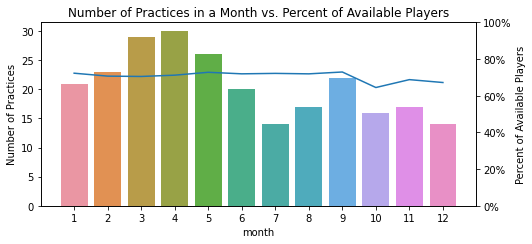

In [42]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

ax = sns.countplot(x = 'month', data = eda)
ax1 = ax.twinx()
ax2 = ax1.plot(avgMFull['Full%'])

ax1.set_ylim([0, 100])
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())

# plt.legend([ax, ax2], ["Number of Practices", "Percent of Available Players"])
ax.set_ylabel("Number of Practices")
ax1.set_ylabel("Percent of Available Players")
plt.title("Number of Practices in a Month vs. Percent of Available Players")
plt.show()

In [38]:
avgMWell = eda.groupby('month', as_index = False)['Wellness Score'].mean()

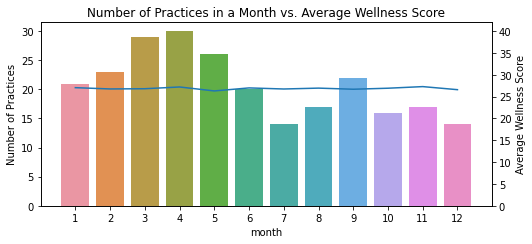

In [40]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

ax = sns.countplot(x = 'month', data = eda)
ax1 = ax.twinx()
ax2 = ax1.plot(avgMWell['Wellness Score'])

ax1.set_ylim([0, 42])

# plt.legend([ax, ax2], ["Number of Practices", "Percent of Available Players"])
ax.set_ylabel("Number of Practices")
ax1.set_ylabel("Average Wellness Score")
plt.title("Number of Practices in a Month vs. Average Wellness Score")
plt.show()

In [43]:
avgMLoad = eda.groupby('month', as_index = False)['Drill Running Load'].mean()

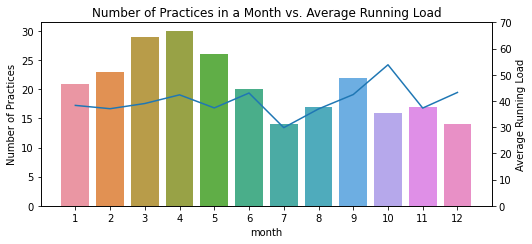

In [46]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

ax = sns.countplot(x = 'month', data = eda)
ax1 = ax.twinx()
ax2 = ax1.plot(avgMLoad['Drill Running Load'])

ax1.set_ylim([0,70])

# plt.legend([ax, ax2], ["Number of Practices", "Percent of Available Players"])
ax.set_ylabel("Number of Practices")
ax1.set_ylabel("Average Running Load")
plt.title("Number of Practices in a Month vs. Average Running Load")
plt.show()

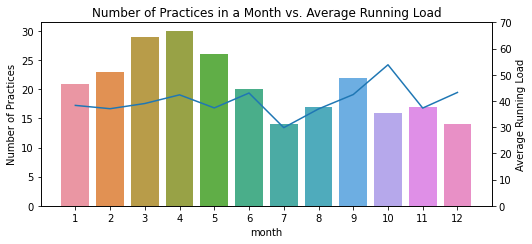

In [47]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

ax = sns.countplot(x = 'month', data = eda)
ax1 = ax.twinx()
ax2 = ax1.plot(avgMLoad['Drill Running Load'], )

ax1.set_ylim([0,70])

# plt.legend([ax, ax2], ["Number of Practices", "Percent of Available Players"])
ax.set_ylabel("Number of Practices")
ax1.set_ylabel("Average Running Load")
plt.title("Number of Practices in a Month vs. Average Running Load")
plt.show()

In [48]:
totalMLoad = eda.groupby('month', as_index = False)['Drill Running Load'].sum()
totalMLoad['Full%'] = avgMFull['Full%']
totalMLoad

,month,Drill Running Load,Full%
0,1,804.823231,72.299896
1,2,852.441608,70.706417
2,3,1132.249275,70.523199
3,4,1270.586244,71.231780
4,5,971.345262,72.797935
5,6,860.967158,71.958282
6,7,417.568544,72.198767
7,8,628.495084,71.947925
8,9,934.229098,72.955642
9,10,861.201421,64.496650


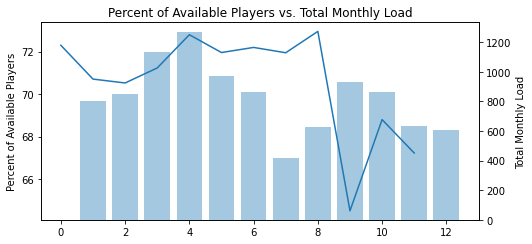

In [49]:
fig, ax1 = plt.subplots()
ax1.plot(totalMLoad['Full%'])
ax1t = ax1.twinx()

ax1t.bar(np.arange(1,13,1), totalMLoad['Drill Running Load'], alpha = 0.4)

ax1.set_ylabel("Percent of Available Players")
ax1t.set_ylabel("Total Monthly Load")
plt.title("Percent of Available Players vs. Total Monthly Load")
plt.show()

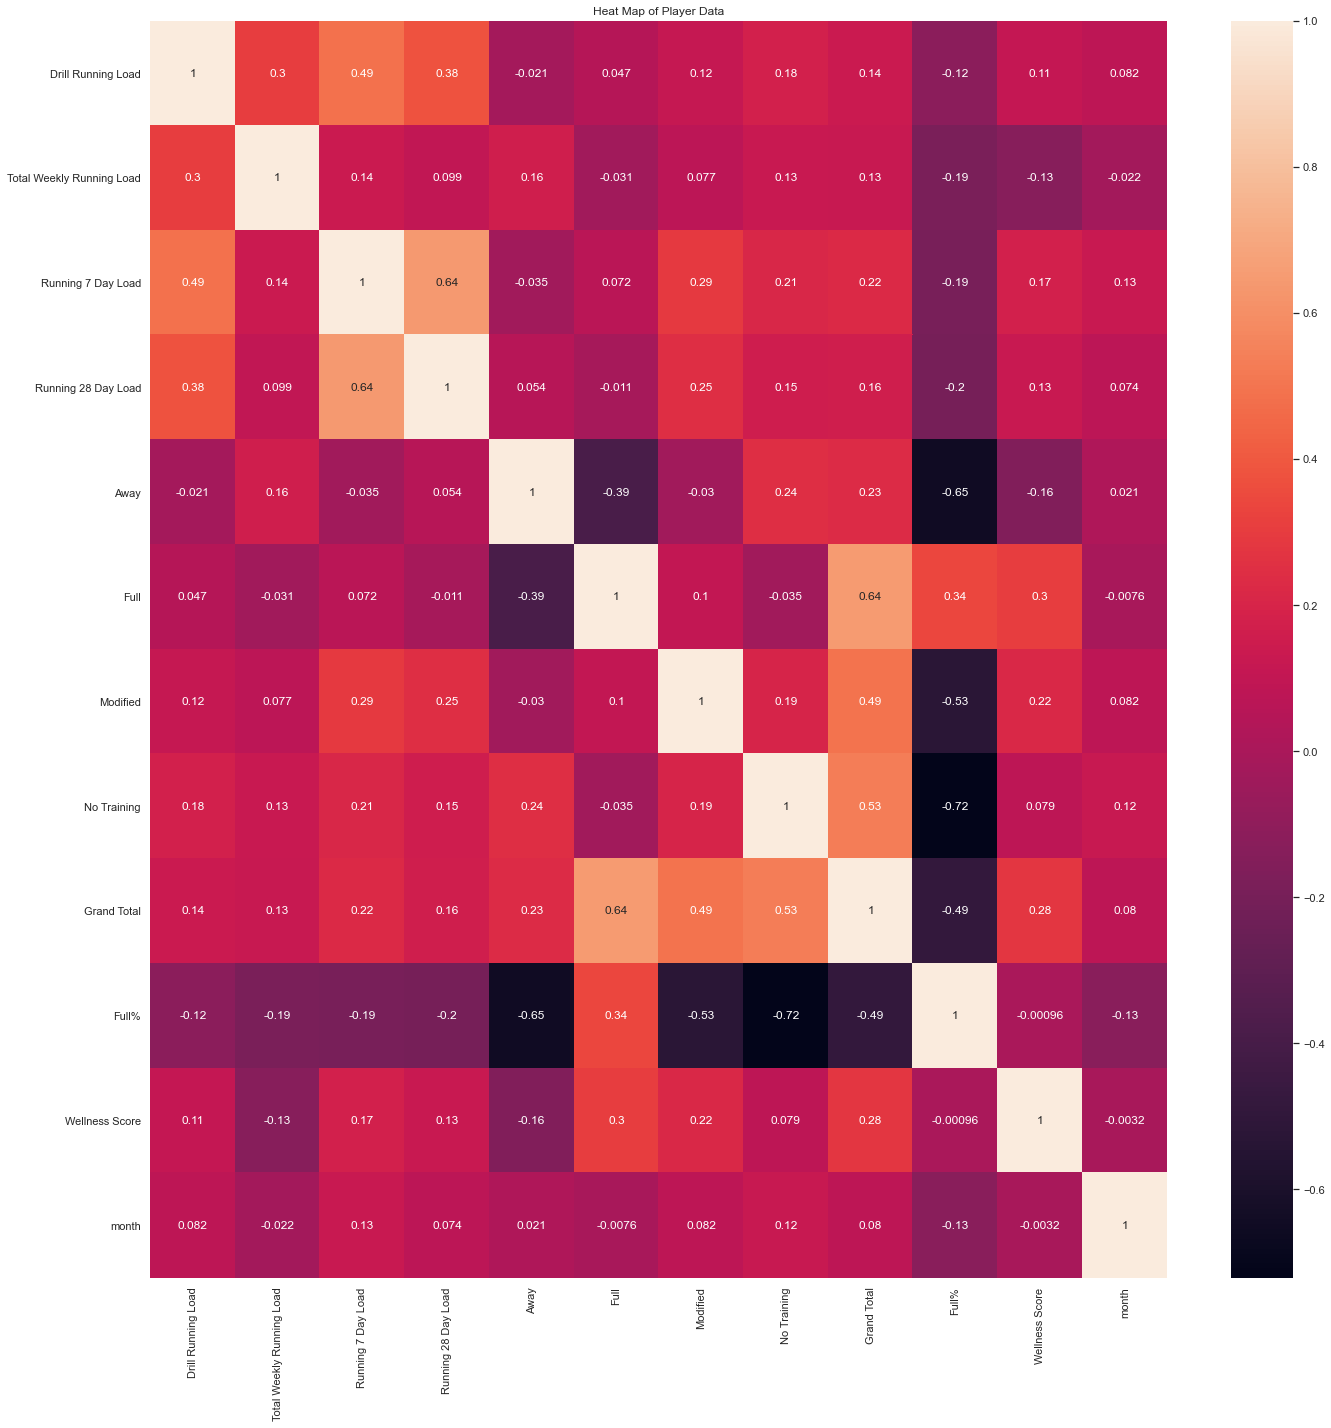

In [56]:
# view correlation
sns.heatmap(df.corr(), annot = True)
sns.set(rc = {"figure.figsize":(20,20)})
plt.title('Heat Map of Player Data')
plt.show()

In [55]:
# grand total, away, full, modified, no training will be dropped - Full% represents this data 
# we will break Drill Running Load, Total Weekly Running Load, Running 7 Day Load and Running 28 Day Load 
# into 3 separate dataframes and all together to determine which affect Full% more

### Data Preparation

In [71]:
df.columns

Index(['Date', 'Drill Running Load', 'Total Weekly Running Load',
       'Running 7 Day Load', 'Running 28 Day Load', 'Away', 'Full', 'Modified',
       'No Training', 'Grand Total', 'Full%', 'Wellness Score', 'month'],
      dtype='object')

In [72]:
# create the 5 dataframes
dfall = df[['Drill Running Load', 'Total Weekly Running Load', 'Running 7 Day Load', 'Running 28 Day Load', 'Full%', 'Wellness Score', 'month']]
dfdrill = dfall.drop(['Total Weekly Running Load', 'Running 7 Day Load', 'Running 28 Day Load'], axis = 1)
dfweek = dfall.drop(['Drill Running Load', 'Running 7 Day Load', 'Running 28 Day Load'], axis = 1)
df7 = dfall.drop(['Drill Running Load', 'Total Weekly Running Load', 'Running 28 Day Load'], axis = 1)
df28 = dfall.drop(['Drill Running Load', 'Total Weekly Running Load', 'Running 7 Day Load'], axis = 1)

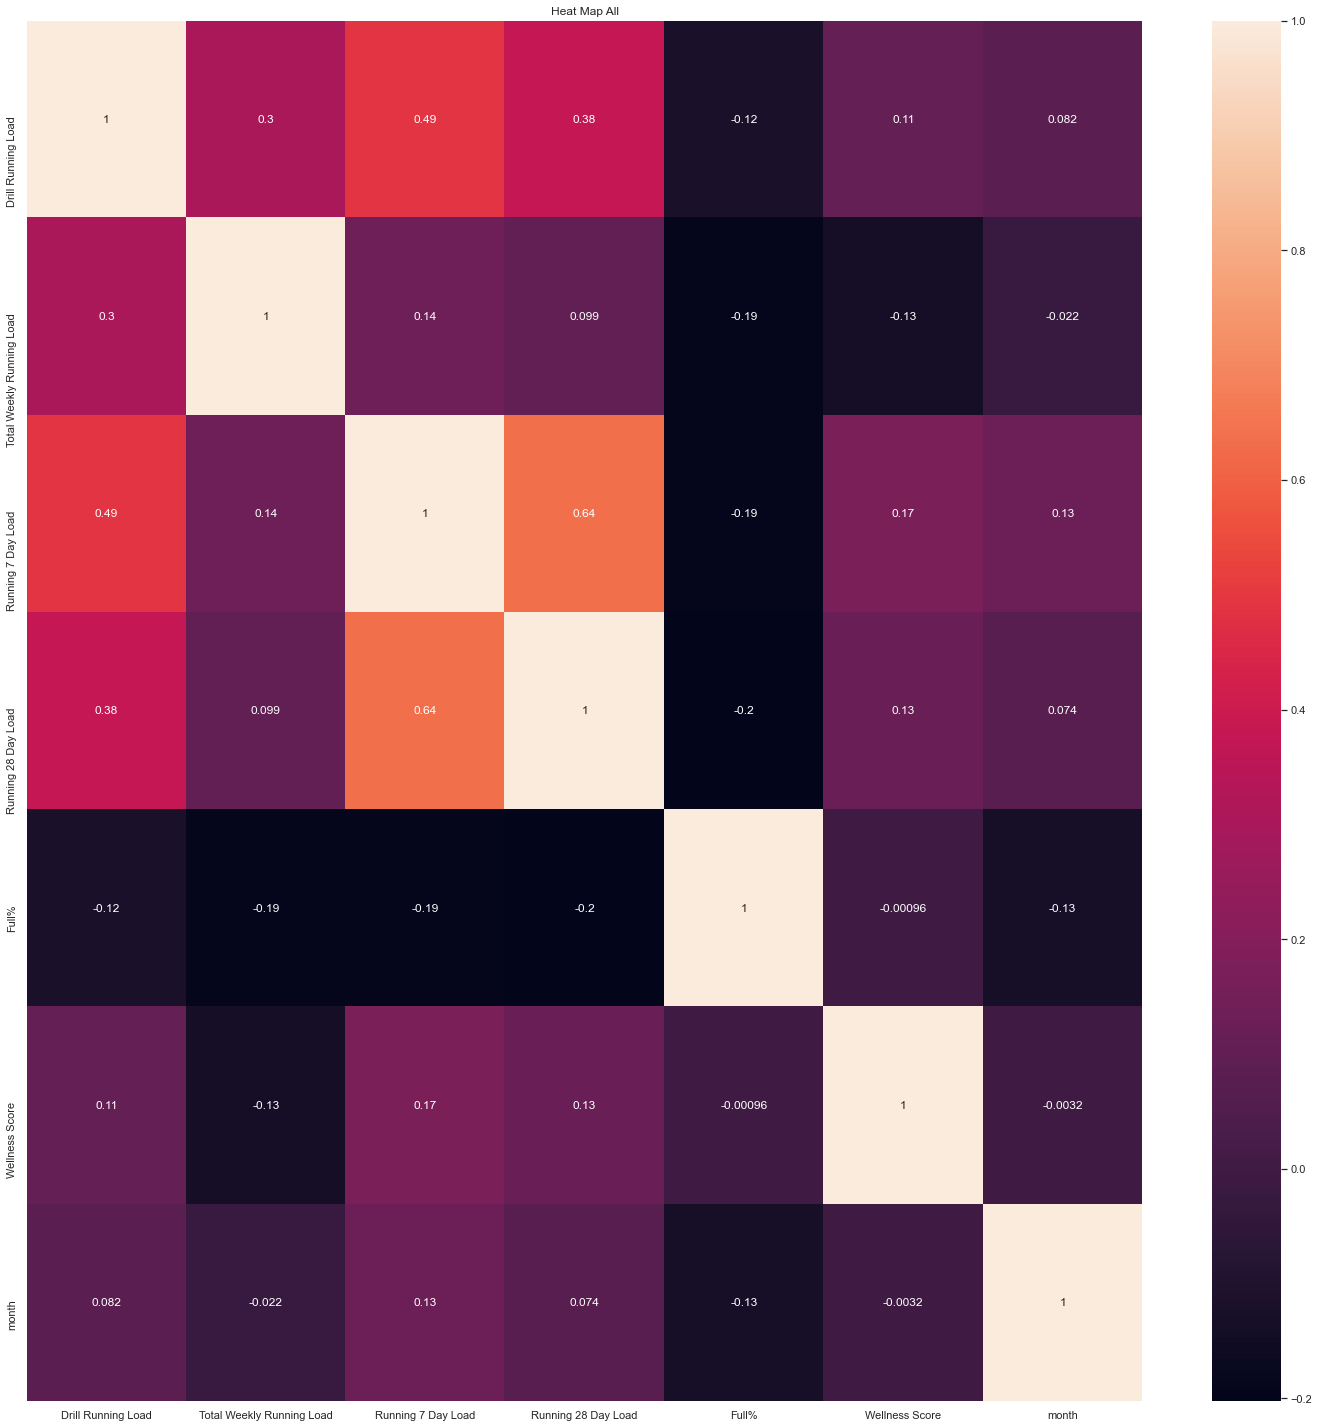

In [87]:
# view correlation of each dataframe for fun
sns.heatmap(dfall.corr(), annot = True)
sns.set(rc = {"figure.figsize":(10,10)})
plt.title('Heat Map All')
plt.show()

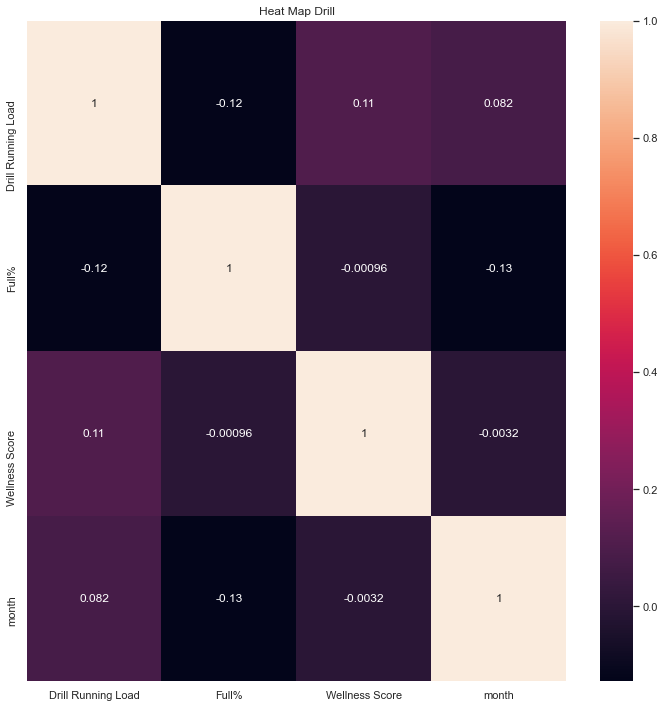

In [89]:
# view correlation of each dataframe for fun
sns.heatmap(dfdrill.corr(), annot = True)
sns.set(rc = {"figure.figsize":(10,10)})
plt.title('Heat Map Drill')
plt.show()

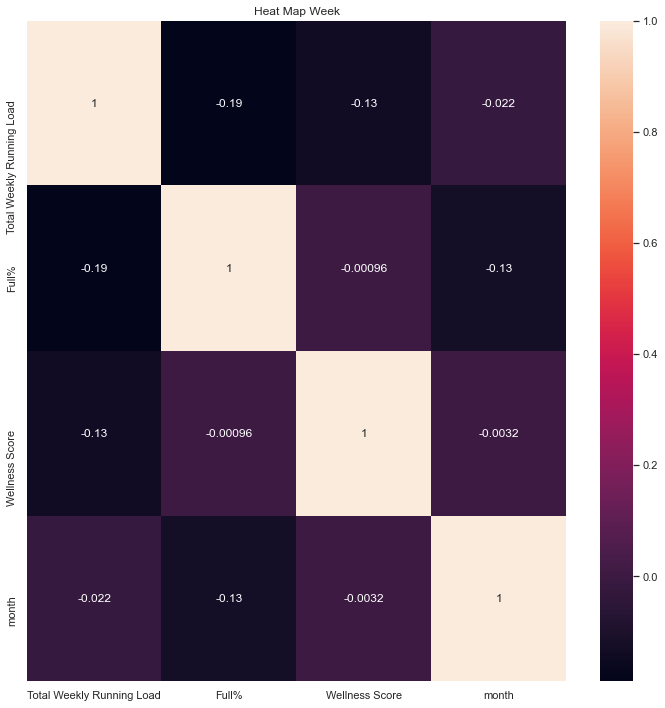

In [90]:
# view correlation of each dataframe for fun
sns.heatmap(dfweek.corr(), annot = True)
sns.set(rc = {"figure.figsize":(10,10)})
plt.title('Heat Map Week')
plt.show()

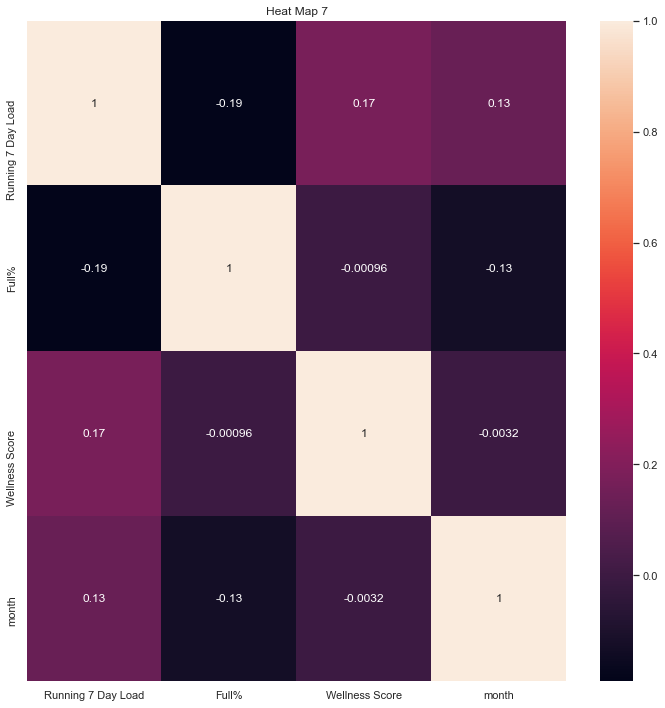

In [91]:
# view correlation of each dataframe for fun
sns.heatmap(df7.corr(), annot = True)
sns.set(rc = {"figure.figsize":(10,10)})
plt.title('Heat Map 7')
plt.show()

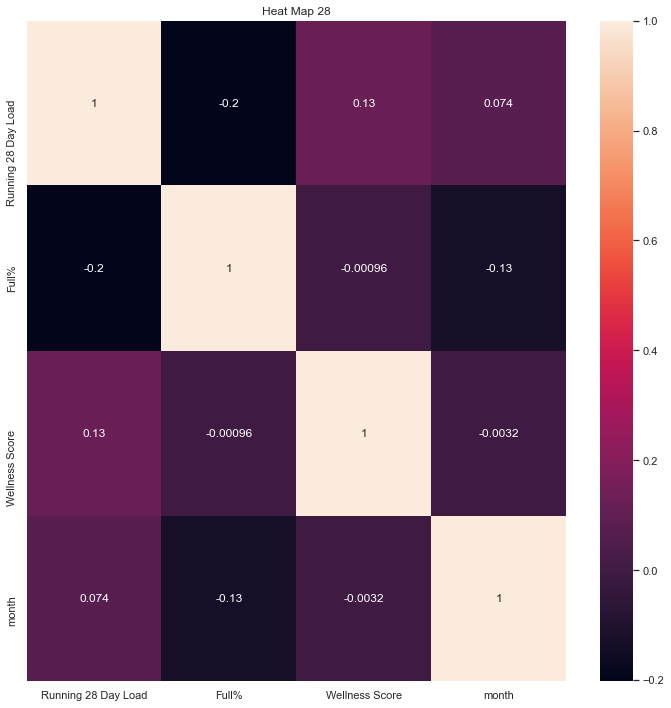

In [92]:
# view correlation of each dataframe for fun
sns.heatmap(df28.corr(), annot = True)
sns.set(rc = {"figure.figsize":(10,10)})
plt.title('Heat Map 28')
plt.show()

In [73]:
# check to see if we need onehotencoding
dfall.dtypes

Drill Running Load           float64
Total Weekly Running Load    float64
Running 7 Day Load           float64
Running 28 Day Load          float64
Full%                        float64
Wellness Score               float64
month                          int64
dtype: object

In [74]:
dfall.columns

Index(['Drill Running Load', 'Total Weekly Running Load', 'Running 7 Day Load',
       'Running 28 Day Load', 'Full%', 'Wellness Score', 'month'],
      dtype='object')

In [81]:
# data splitting
X = dfall.drop(['Full%'], axis = 1)
y = dfall['Full%']
X_trainall, X_testall, y_trainall, y_testall= train_test_split(X, y, test_size = 0.2, random_state = 30)

In [82]:
X = dfdrill.drop(['Full%'], axis = 1)
y = dfdrill['Full%']
X_traindrill, X_testdrill, y_traindrill, y_testdrill= train_test_split(X, y, test_size = 0.2, random_state = 30)

In [85]:
X = dfweek.drop(['Full%'], axis = 1)
y = dfweek['Full%']
X_trainweek, X_testweek, y_trainweek, y_testweek= train_test_split(X, y, test_size = 0.2, random_state = 30)

In [83]:
X = df7.drop(['Full%'], axis = 1)
y = df7['Full%']
X_train7, X_test7, y_train7, y_test7 = train_test_split(X, y, test_size = 0.2, random_state = 30)

In [84]:
X = df28.drop(['Full%'], axis = 1)
y = df28['Full%']
X_train28, X_test28, y_train28, y_test28 = train_test_split(X, y, test_size = 0.2, random_state = 30)

### Modeling